## Download and install requisite libraries and packages
---

In [4]:
import sys
!{sys.executable} -m pip install plotly==4.14.3
!{sys.executable} -m pip install advertools==0.11.1
!{sys.executable} -m pip install psutil requests==2.25.1
!{sys.executable} -m pip install jupyterlab "ipywidgets>=7.5"
!{sys.executable} -m pip install "notebook>=5.3" "ipywidgets>=7.5"

  Attempting uninstall: requests
    Found existing installation: requests 2.1.0
    Uninstalling requests-2.1.0:
      Successfully uninstalled requests-2.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
app-store-scraper 0.3.5 requires requests==2.23.0, but you have requests 2.25.1 which is incompatible.


In [3]:
!npm i orca@1.3.1


added 92 packages, removed 41 packages, and audited 141 packages in 12s

5 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities


npm notice 
npm notice New minor version of npm available! 7.7.6 -> 7.18.1
npm notice Changelog: <https://github.com/npm/cli/releases/tag/v7.18.1>
npm notice Run `npm install -g npm@7.18.1` to update!
npm notice 
npm WARN deprecated left-pad@1.3.0: use String.prototype.padStart()
npm WARN deprecated request-promise-native@1.0.9: request-promise-native has been deprecated because it extends the now deprecated request package, see https://github.com/request/request/issues/3142
npm notice 
npm notice New minor version of npm available! 7.7.6 -> 7.18.1
npm notice Changelog: <https://github.com/npm/cli/releases/tag/v7.18.1>
npm notice Run `npm install -g npm@7.18.1` to update!
npm notice 


### JupyterLab renderer support
install the required JupyterLab extensions

In [5]:
!jupyter labextension install jupyterlab-plotly@4.14.3

^C


In [7]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd 
import numpy as np
import sklearn
import os

## Import and prepare CSV files
---

In [140]:
gps_df = pd.read_csv('data/play_store_reviews.csv')
as_df = pd.read_csv('data/app_store_reviews.csv')
combined_df = pd.read_csv('data/combined_reviews.csv')

# convert date columns to datetime since dtypes aren't preserved in csv files
gps_df['at'] = pd.to_datetime(gps_df['at'])
as_df['date'] = pd.to_datetime(as_df['date'])
combined_df['date'] = pd.to_datetime(combined_df['date'])

In [141]:
# drop unnecessary columns
gps_df = gps_df.drop(['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent', 'repliedAt'], axis=1)
gps_df['type'] = 'play store'

gps_df.info()
print(display(gps_df.head(10)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110606 entries, 0 to 110605
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   content  110597 non-null  object        
 1   score    110606 non-null  int64         
 2   at       110606 non-null  datetime64[ns]
 3   type     110606 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.4+ MB


,content,score,at,type
0,Friendly user.,5,2020-08-05 06:23:06,play store
1,nice and easy,5,2021-05-07 12:10:07,play store
2,Amazing gcash,5,2021-04-11 06:13:37,play store
3,Nice apps ever last thing 🔥🔥🔥🔥🔥😍😍😍😍😍😘😘😘😘😘,5,2021-02-26 01:45:39,play store
4,Very convinience,5,2020-08-02 04:48:25,play store
5,wow,5,2020-03-30 03:43:02,play store
6,Excellent,5,2020-10-22 15:58:33,play store
7,Kkkkkkkk,5,2020-10-25 05:57:47,play store
8,Nice,5,2021-03-06 12:42:25,play store
9,vgood,5,2021-04-06 07:14:31,play store


None


In [142]:
as_df = as_df.drop(['title', 'userName', 'isEdited', 'developerResponse'], axis=1)
as_df['type'] = 'app store'

as_df.info()
print(display(as_df.head(10)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1669 non-null   datetime64[ns]
 1   review  1669 non-null   object        
 2   rating  1669 non-null   int64         
 3   type    1669 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 52.3+ KB


,date,review,rating,type
0,2021-02-17 06:32:13,Nakakadismaya naman. Dati okay naman yung gcas...,1,app store
1,2020-03-24 03:28:48,Don’t ever put your money here! My transaction...,1,app store
2,2020-09-15 16:58:57,Best as it has no fees. Wish they had rebates ...,5,app store
3,2020-06-07 09:31:21,Gcash has been very helpful in many ways to me...,1,app store
4,2020-09-25 09:19:47,I USED METROBANK INSTAPAY TO CASH IN BUT UNTIL...,1,app store
5,2021-01-31 02:22:08,My account was charged without the transaction...,1,app store
6,2020-07-22 08:00:54,you've alway have deductions everytime we have...,1,app store
7,2020-04-20 19:30:59,So the first time I used this app they ask me ...,1,app store
8,2020-06-16 13:13:06,please fix this problem for the first time use...,1,app store
9,2020-12-09 06:42:52,I sent wrong number pls help me to refund my m...,5,app store


None


In [143]:
# init empty DF
combined_df = pd.DataFrame()

# populate lists
date_lst = gps_df['at'].values.tolist() + as_df['date'].values.tolist()
review_lst = gps_df['content'].values.tolist() + as_df['review'].values.tolist()
rating_lst = gps_df['score'].values.tolist() + as_df['rating'].values.tolist()
type_lst = gps_df['type'].values.tolist() + as_df['type'].values.tolist()

# populate DF
combined_df['date'] = date_lst
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df['review'] = review_lst
combined_df['rating'] = rating_lst
combined_df['type'] = type_lst

# shuffle rows
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

# drop rows that have NULL entries
combined_df = combined_df.dropna()

# drop rows that have duplicates
combined_df = combined_df.drop_duplicates()

combined_df.info()
print(display(combined_df.head(10)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112264 entries, 0 to 112274
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    112264 non-null  datetime64[ns]
 1   review  112264 non-null  object        
 2   rating  112264 non-null  int64         
 3   type    112264 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.3+ MB


,date,review,rating,type
0,2021-05-07 02:19:38,I recommend Gcash Mod Apk,5,play store
1,2021-04-15 11:54:46,Very Nice,5,play store
2,2021-05-10 07:52:13,Its good to use,5,play store
3,2020-07-24 03:29:53,"Can you fix the bug or something , when I get ...",5,play store
4,2021-01-04 03:41:12,Hassle not accepting TIN id for verification!!!,1,play store
5,2020-10-23 04:35:36,Awesome,5,play store
6,2021-01-07 07:12:55,Good,5,play store
7,2021-04-12 00:41:42,THANK YOU GLOBE AT SA WAKAS BIOMETERICS NA DIN...,1,play store
8,2020-01-18 17:57:39,Its very usefull i can pay bill with this app,5,play store
9,2020-11-24 18:09:23,Nice,5,play store


None


### Export combined_df as CSV

In [21]:
combined_df.to_csv('data/combined_reviews.csv', index=False)

In [8]:
combined_df = pd.read_csv('data/combined_reviews.csv')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112264 entries, 0 to 112263
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    112264 non-null  object
 1   review  112264 non-null  object
 2   rating  112264 non-null  int64 
 3   type    112264 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


## Exploratory Data Analysis
---

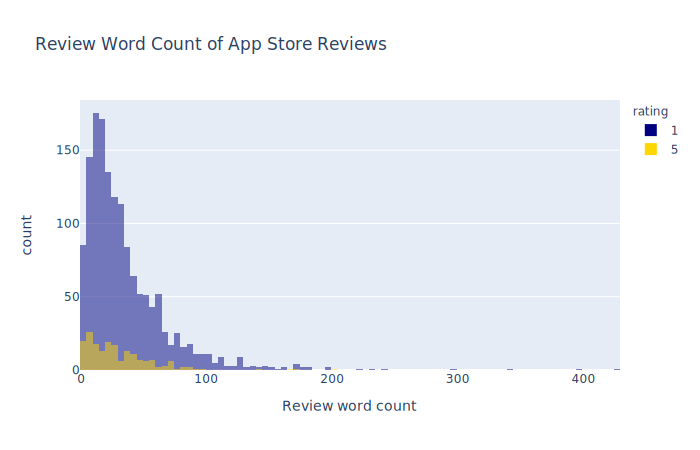

In [10]:
import plotly.io as pio
pio.renderers.default = "iframe"

# disable false positive warning
pd.options.mode.chained_assignment = None  # default='warn'

# init empty DF
ax = pd.DataFrame()

# Collect and store all App Store reviews in a temporary DF
ax = combined_df.loc[combined_df['type'] == 'app store']
ax['Review word count'] = ax['review'].str.count(' ') + 1

fig = px.histogram(
    ax, 
    x='Review word count',
    color='rating',
    color_discrete_sequence=['navy', 'gold'],
    title='Review Word Count of App Store Reviews',
    barmode='overlay',
    width=950,
    height=500
)
fig.show()

# for graph to persist outside session
fig.show(renderer="svg")

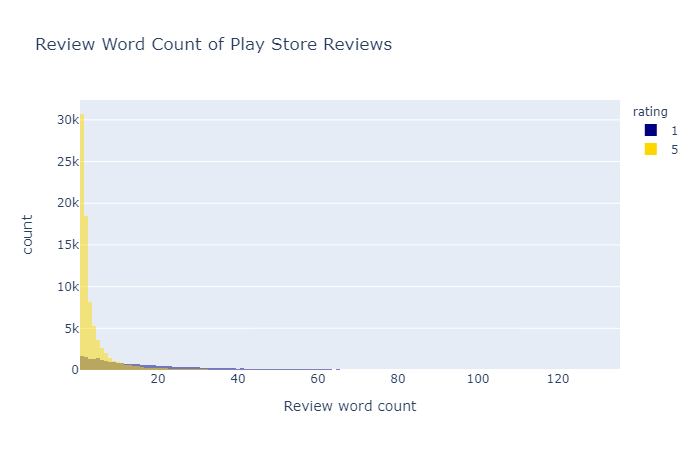

In [11]:
# init empty DF
bx = pd.DataFrame()

# Collect and store all Play Store reviews in a temporary DF
bx = combined_df.loc[combined_df['type'] == 'play store']
bx['Review word count'] = bx['review'].str.count(' ') + 1

fig = px.histogram(
    bx, 
    x='Review word count',
    color='rating',
    labels=['Word count', 'Review count'],
    color_discrete_sequence=['navy', 'gold'],
    title='Review Word Count of Play Store Reviews',
    barmode='overlay',
    width=950, 
    height=500
)
fig.show()

# for graph to persist outside session
fig.show(renderer="png")

## Convert plain text to bag-of-words (BOW)
---

In [242]:
import re
import nltk
import spacy 
import advertools as adv
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import wordnet, words, stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# concatenate english and tagalog stopwords into one list
stop_words = stopwords.words('english') + list(adv.stopwords['tagalog']) + \
            ['gcash', 'could', 'doe', 'ha', 'might', 'must', 'need', 'sha', 'wa', 'wo', \
             'would', 'di', 'far', 'nag', 'already', 'always', 'app', 'cant', 'dont', 'even', \
             'get', 'issue', 'please', 'say', 'still', 'try', 'use', 'yung', 'day', 'go', 'im', \
             'keep', 'lang', 'like', 'make', 'nyo', 'problem', 'work', 'the', 'to', 'ive', 'naman', 'verify', 'fully']

token_pattern = re.compile(r"(?u)\b\w\w+\b")

# Helper function to lemmatize with part of speech (POS) tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(word, get_wordnet_pos(word)) for word in word_tokenize(doc) if len(word) >= 2 and re.match("[a-z].*", word) and re.match(token_pattern, word)]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matthewkent.regalado\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matthewkent.regalado\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matthewkent.regalado\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\matthewkent.regalado\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [252]:
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

data = []

# test_df = combined_df.loc[combined_df['rating'] == 1]
test_df = combined_df.loc[(combined_df['type'] == 'app store') & (combined_df['rating'] == 1)]

# perform train test split
train_data, val_data = train_test_split(test_df, train_size=0.8)
train_data, test_data = train_test_split(train_data, train_size=0.8) 

# print(display(train_vectors))
# print(display(val_vectors))
# print(display(test_vectors))

first_batch = train_data.review.values.tolist()
second_batch = val_data.review.values.tolist()
third_batch = test_data.review.values.tolist()

vocab_size = 30

print('Tokenizing and counting, this may take a few minutes...')
start_time = time.time()
vectorizer = CountVectorizer(
    input='content', 
    analyzer='word', 
    stop_words=stop_words,
    tokenizer=LemmaTokenizer(),
    strip_accents='ascii',
    max_features=vocab_size, 
#     max_df=0.95, 
#     min_df=0.2
)

# vectorize data
train_vectors = vectorizer.fit_transform(first_batch)
vocab_list = vectorizer.get_feature_names()
removed_words = vectorizer.get_stop_words()

val_vectors = vectorizer.fit_transform(second_batch)
test_vectors = vectorizer.fit_transform(third_batch)

print('vocab size:', len(vocab_list))
print(f'\nrows, vocab length:\n{train_vectors.shape}')
print(f'\nremoved stop-words:\n{removed_words}')
print('\nDone. Time elapsed: {:.2f}s'.format(time.time() - start_time))

Tokenizing and counting, this may take a few minutes...
vocab size: 30

rows, vocab length:
(949, 30)

removed stop-words:
frozenset({'kanila', 'are', 'about', 'any', 'ito', 'doon', 'needn', 'ang', 'will', 'noon', 'both', 'be', 'hanggang', 'pagitan', 'pareho', 'his', 'kaya', 'sabi', 'karamihan', 'he', "shouldn't", 'before', 'what', 'don', 'atin', 'wouldn', 'itaas', 'always', 'aming', 'over', 'paggawa', 'after', 'couldn', "shan't", 'ilagay', 'already', 'yung', 'din', 'huwag', "wasn't", 'all', 'anumang', 'until', 'each', 'una', 'bawat', 'they', 'ano', "you'll", 'paano', 'kung', 'below', 'pa', 'some', 'then', 'mustn', 'maaari', 'niyang', 'maging', 'own', 'sa', 'doe', 'katiyakan', 'nyo', 'pumunta', 'sino', 'iyong', 'nor', 'that', 'were', 'i', 'hindi', 'ngayon', 'doesn', 'we', 'ourselves', 'kaysa', 'sabihin', 'wa', 'dont', "weren't", 'itself', 'whom', 'even', "hadn't", 'who', 'didn', 'ay', "doesn't", 'makita', 'hers', 'myself', 'bilang', 'pumupunta', 'not', 'so', 'ma', 'further', 'problem',

In [253]:
import random 

value = random.randrange(0, 900)

print(f'index: {value}')
print(f'\noriginal text:\n{train_data.review.values.tolist()[value]}')
print(f'\nvectorized text:\n{train_vectors[value].todense()}')
print(f'\nvocab list:\n{vocab_list}')

index: 383

original text:
I can't open my Gcash account i forgot my mpin and also the questions aftercthey send me the verification code. Please help me!

vectorized text:
[[1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]]

vocab list:
['account', 'ask', 'bank', 'cash', 'code', 'customer', 'email', 'error', 'fix', 'fully', 'give', 'help', 'id', 'load', 'money', 'number', 'option', 'pay', 'receive', 'send', 'service', 'student', 'support', 'take', 'ticket', 'time', 'transaction', 'transfer', 'update', 'verification']


In [254]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

counts = pd.DataFrame(
    vectors.toarray(),
    columns=vectorizer.get_feature_names()
)
counts

,account,also,bank,card,cash,customer,error,fix,fully,help,id,load,log,money,number,one,open,option,phone,po,send,service,student,submit,take,time,transaction,transfer,update,verification
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
946,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3
947,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Tokenize and lemmatize review data

In [62]:
import time
from sklearn.feature_extraction.text import CountVectorizer

data = []

# test_df = combined_df.loc[combined_df['rating'] == 1]
test_df = combined_df.loc[(combined_df['type'] == 'app store') & (combined_df['rating'] == 1)]
# data = combined_df.review.values.tolist()
data = test_df.review.values.tolist()
vocab_size = 100

print('Tokenizing and counting, this may take a few minutes...')
start_time = time.time()
vectorizer = CountVectorizer(
    input='content', 
    analyzer='word', 
    stop_words=stop_words,
    tokenizer=LemmaTokenizer(),
    strip_accents='ascii',
    max_features=vocab_size, 
    max_df=0.95, 
    min_df=2
)

vectors = vectorizer.fit_transform(data)
vocab_list = vectorizer.get_feature_names()
print('vocab size:', len(vocab_list))

# # random shuffle
# idx = np.arange(vectors.shape[0])
# np.random.shuffle(idx)
# vectors = vectors[idx]

print(f'\nrows, vocab length:\n{vectors.shape}')
print('\nDone. Time elapsed: {:.2f}s'.format(time.time() - start_time))

Tokenizing and counting, this may take a few minutes...
vocab size: 100

rows, vocab length:
(1484, 100)

Done. Time elapsed: 0.92s


In [33]:
# threshold = 5
# test = vectors

# for i in range(0, 10):
#     print(test[i].todense())
#     print(test[i].sum(axis=1))
# # test.sum(axis=1)>threshold
# # test[np.array(test.sum(axis=1)>threshold).reshape(-1,)]

### Remove reviews shorter than three words
Very short reviews won't be able to express more than a single topic

In [34]:
# print(f'Before:\n{vectors.shape}')

# threshold = 5
# test = test[np.array(test.sum(axis=1)>threshold).reshape(-1,)]
# print(f'\nAfter removing short reviews (<{threshold} words):')        
# print(test.shape)

# print(f'\n{type(test), test.dtype}')
# print(test[0])

In [35]:
# test[0].todense()

### Type-cast input dat to np.float32 since all the params (i.e. weights and biases) in the NTM model will also follow that format
This is a more optimal approach as opposed to repeatedly type-casting during mini-batch training

In [51]:
import scipy.sparse as sparse

vectors = sparse.csr_matrix(vectors, dtype=np.float32)
print(type(vectors), vectors.dtype)
print(vectors[0])

<class 'scipy.sparse.csr.csr_matrix'> float32
  (0, 5)	2.0
  (0, 0)	1.0


In [54]:
vectors[0].todense()

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Split data to training (20%), validation (40%), and test (40%) datasets

In [55]:
n_train = int(0.8 * vectors.shape[0])

# split train and test
train_vectors = vectors[:n_train, :]
test_vectors = vectors[n_train:, :]

# further split test set into validation set (val_vectors) and test  set (test_vectors)
n_test = test_vectors.shape[0]
val_vectors = test_vectors[:n_test//2, :]
test_vectors = test_vectors[n_test//2:, :]

print(f'Training data shape:\n{train_vectors.shape}')
print(f'\nValidation data shape:\n{val_vectors.shape}')
print(f'\nTest data shape:\n{test_vectors.shape}')

Training data shape:
(1187, 12)

Validation data shape:
(148, 12)

Test data shape:
(149, 12)


### Convert data into RecordIO Protobuf format using the SageMaker Python API and store everything in S3

In [56]:
import scipy

# convert sparse CSR matrices to numpy arrays
train_vectors = scipy.sparse.csr_matrix.toarray(train_vectors)
val_vectors = scipy.sparse.csr_matrix.toarray(val_vectors)
test_vectors = scipy.sparse.csr_matrix.toarray(test_vectors)

In [57]:
import io
import boto3
import sagemaker
import datetime as dt
import sagemaker.amazon.common as smac

sesh = sagemaker.Session()
prefix = "sagemaker/regalado"
bucket = sesh.default_bucket()
curr_dtime = time.strftime("%Y%m%d-%H%M%S")

def convAndStore(dtype, key, vectors):
    # convert data to a recordIO-wrapped protobuf format used by the Amazon SageMaker algorithms
    
    # init memory buffer in RAM where data will be written
    buf = io.BytesIO()

    # write train data (numpy array) into a dense tensor 
    # smac.write_numpy_to_dense_tensor(buf, X_train.astype("float32"), y_train.astype("float32"))
    smac.write_numpy_to_dense_tensor(buf, vectors)

    # sets the file's current position at the offset (0)
    # i.e. set the reference point to the beginning of the memory buffer
    buf.seek(0)
    
    # upload to s3
    key = str(key)
    

    boto3.resource("s3").Bucket(bucket).Object(os.path.join(prefix, dtype, key)).upload_fileobj(buf)
    s3_data = f"s3://{bucket}/{prefix}/{dtype}/{key}"
    
    print(f"Uploaded {dtype} data at: {s3_data}")
    
    return s3_data
    
s3_train_data = convAndStore('train', curr_dtime, train_vectors)
s3_valid_data = convAndStore('valid', curr_dtime, val_vectors)
s3_test_data = convAndStore('test', curr_dtime, test_vectors)

Uploaded train data at: s3://sagemaker-us-east-1-305262579855/sagemaker/regalado/train/20210619-080822
Uploaded valid data at: s3://sagemaker-us-east-1-305262579855/sagemaker/regalado/valid/20210619-080822
Uploaded test data at: s3://sagemaker-us-east-1-305262579855/sagemaker/regalado/test/20210619-080822


## Model training
---

### Set credentials

In [58]:
from sagemaker import tuner
from sagemaker import get_execution_role
from sagemaker.image_uris import retrieve

sesh = sagemaker.Session()
role = get_execution_role()
region = boto3.Session().region_name    
container = retrieve('ntm', region)
client = boto3.Session().client('sagemaker')
output_prefix = os.path.join(prefix, 'output')
output_path = os.path.join('s3://', bucket, output_prefix)

2021-06-19 08:08:41,904 | INFO | image_uris.py:162 | _config_for_framework_and_scope | Same images used for training and inference. Defaulting to image scope: inference.
2021-06-19 08:08:41,905 | INFO | image_uris.py:198 | _validate_version_and_set_if_needed | Defaulting to the only supported framework/algorithm version: 1.
2021-06-19 08:08:41,915 | INFO | image_uris.py:224 | _processor | Ignoring unnecessary instance type: None.


In [59]:
!pip install 'sagemaker[local]' --upgrade

In [88]:
!sudo service docker restart

Stopping docker: [  OK  ]
Starting docker:	.[  OK  ]


In [89]:
ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.c4.xlarge', # Free-tier instance
    output_path=output_path,
    sagemaker_session=sesh
)

In [90]:
num_topics = 10

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    epochs=100, 
    num_patience_epochs=5, 
    tolerance=0.001,
#     mini_batch_size=128,
#     learning_rate=1e-4
)

## Base model training
---

In [91]:
# ntm.fit(inputs={'train': s3_train_data, 'validation': s3_valid_data})

## Automatic Hyperparameter Tuning
---

In [92]:
hyperparameter_ranges = {
    'weight_decay': tuner.ContinuousParameter(0.1, 1.0),
    'mini_batch_size': tuner.IntegerParameter(16, 2048),
    'learning_rate': tuner.ContinuousParameter(1e-4, 0.1),
    'rescale_gradient': tuner.ContinuousParameter(0.1, 1.0),
    'optimizer': tuner.CategoricalParameter(['sgd', 'adam', 'adadelta']),
    'encoder_layers_activation': tuner.CategoricalParameter(['sigmoid', 'tanh', 'relu'])
}

objective_metric_name = 'validation:total_loss'

In [93]:
hyperparameter_tuner = tuner.HyperparameterTuner(
    ntm,
    objective_metric_name,
    hyperparameter_ranges, 
    objective_type='Minimize',
    max_jobs=20,
    max_parallel_jobs=4
)

In [94]:
hyperparameter_tuner.fit(
    {'train': s3_train_data, 'validation': s3_valid_data},
    include_cls_metadata=False,
    wait=False
)

job_name = hyperparameter_tuner.latest_tuning_job.job_name

response = client.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=job_name
)

response['HyperParameterTuningJobStatus']

2021-06-19 08:50:46,800 | INFO | image_uris.py:198 | _validate_version_and_set_if_needed | Defaulting to the only supported framework/algorithm version: latest.
2021-06-19 08:50:46,812 | INFO | image_uris.py:224 | _processor | Ignoring unnecessary instance type: None.
2021-06-19 08:50:46,814 | INFO | session.py:2050 | create_tuning_job | Creating hyperparameter tuning job with name: ntm-210619-0850


'InProgress'

In [95]:
from pprint import pprint

pprint(response)

{'CreationTime': datetime.datetime(2021, 6, 19, 8, 50, 47, 88000, tzinfo=tzlocal()),
 'HyperParameterTuningJobArn': 'arn:aws:sagemaker:us-east-1:305262579855:hyper-parameter-tuning-job/ntm-210619-0850',
 'HyperParameterTuningJobConfig': {'HyperParameterTuningJobObjective': {'MetricName': 'validation:total_loss',
                                                                        'Type': 'Minimize'},
                                   'ParameterRanges': {'CategoricalParameterRanges': [{'Name': 'optimizer',
                                                                                       'Values': ['sgd',
                                                                                                  'adam',
                                                                                                  'adadelta']},
                                                                                      {'Name': 'encoder_layers_activation',
                                      

In [96]:
hyperparameter_tuner.__dict__

{'estimator': <sagemaker.estimator.Estimator at 0x7f6ba7879710>,
 'objective_metric_name': 'validation:total_loss',
 '_hyperparameter_ranges': {'weight_decay': <sagemaker.parameter.ContinuousParameter at 0x7f6ba78794e0>,
  'mini_batch_size': <sagemaker.parameter.IntegerParameter at 0x7f6ba7879550>,
  'learning_rate': <sagemaker.parameter.ContinuousParameter at 0x7f6ba7879588>,
  'rescale_gradient': <sagemaker.parameter.ContinuousParameter at 0x7f6ba7879198>,
  'optimizer': <sagemaker.parameter.CategoricalParameter at 0x7f6ba7879048>,
  'encoder_layers_activation': <sagemaker.parameter.CategoricalParameter at 0x7f6ba7879128>},
 'metric_definitions': None,
 'estimator_dict': None,
 'objective_metric_name_dict': None,
 '_hyperparameter_ranges_dict': None,
 'metric_definitions_dict': None,
 'static_hyperparameters_dict': None,
 'strategy': 'Bayesian',
 'objective_type': 'Minimize',
 'max_jobs': 20,
 'max_parallel_jobs': 4,
 'tags': None,
 'base_tuning_job_name': None,
 '_current_job_name':

In [97]:
tuning_job_name = response['HyperParameterTuningJobName']
%store tuning_job_name

tuning_job_name

Stored 'tuning_job_name' (str)


'ntm-210619-0850'

In [98]:
from time import sleep

while response['HyperParameterTuningJobStatus'] == 'InProgress':
    response = client.describe_hyper_parameter_tuning_job(
        HyperParameterTuningJobName=job_name
    )

    print(response['HyperParameterTuningJobStatus'])
    sleep(60)

InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
Completed


In [99]:
%store -r tuning_job_name

from sagemaker import HyperparameterTuningJobAnalytics

def latest_df():
    analytics = HyperparameterTuningJobAnalytics(tuning_job_name)

    return analytics.dataframe()    

latest_df().sort_values('FinalObjectiveValue', ascending=True)

,encoder_layers_activation,learning_rate,mini_batch_size,optimizer,rescale_gradient,weight_decay,TrainingJobName,TrainingJobStatus,FinalObjectiveValue,TrainingStartTime,TrainingEndTime,TrainingElapsedTimeSeconds
9,sigmoid,0.000390,1936.0,sgd,0.325392,0.177034,ntm-210619-0850-011-f7fcc849,Completed,1.383841e-01,2021-06-19 09:01:04+00:00,2021-06-19 09:02:23+00:00,79.0
7,sigmoid,0.001296,1891.0,sgd,0.104265,0.708640,ntm-210619-0850-013-02b80a83,Completed,1.406603e-01,2021-06-19 09:04:44+00:00,2021-06-19 09:05:50+00:00,66.0
3,sigmoid,0.045842,1846.0,adam,0.497713,0.548716,ntm-210619-0850-017-9a18b2fa,Completed,1.419310e-01,2021-06-19 09:08:49+00:00,2021-06-19 09:09:58+00:00,69.0
8,sigmoid,0.006042,1797.0,sgd,0.222258,0.588514,ntm-210619-0850-012-080e8923,Completed,1.446228e-01,2021-06-19 09:02:47+00:00,2021-06-19 09:03:32+00:00,45.0
16,sigmoid,0.000530,1767.0,sgd,0.445458,0.729603,ntm-210619-0850-004-48544e21,Completed,1.489981e-01,2021-06-19 08:53:45+00:00,2021-06-19 08:54:34+00:00,49.0
12,sigmoid,0.000202,1576.0,sgd,0.116158,0.647923,ntm-210619-0850-008-5f1981a6,Completed,1.738727e-01,2021-06-19 08:58:38+00:00,2021-06-19 08:59:29+00:00,51.0
10,sigmoid,0.000385,1150.0,sgd,0.316493,0.563932,ntm-210619-0850-010-d6dd8228,Completed,2.322491e-01,2021-06-19 09:01:16+00:00,2021-06-19 09:02:24+00:00,68.0
11,sigmoid,0.000461,957.0,sgd,0.166915,0.623094,ntm-210619-0850-009-64cb77ea,Completed,2.815472e-01,2021-06-19 09:00:58+00:00,2021-06-19 09:01:59+00:00,61.0
6,sigmoid,0.013803,926.0,adadelta,0.482479,0.656547,ntm-210619-0850-014-85f1137d,Completed,2.920654e-01,2021-06-19 09:05:08+00:00,2021-06-19 09:06:06+00:00,58.0
14,relu,0.000198,380.0,adam,0.853762,0.979472,ntm-210619-0850-006-2899e4c8,Completed,7.229756e-01,2021-06-19 08:57:24+00:00,2021-06-19 08:58:14+00:00,50.0


<!-- ### Specify how training and validation data will be distributed to the workers during training
ShardedByS3Key: data files will be sharded to different workers, that is, each worker will receive a different portion of the full data set. -->

In [651]:
# from sagemaker.inputs import TrainingInput

# s3_train = TrainingInput(s3_train_data, distribution="ShardedByS3Key") 
# s3_valid = TrainingInput(s3_valid_data) 

## Retrain model with the best hyperparameter values to instantiate an Estimator object required to deploy a SageMaker endpoint
---

In [100]:
import sagemaker

sesh = sagemaker.Session()

ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.m4.xlarge', # Free-tier instance (Free Tier usage per month for the first 2 months) ~ https://aws.amazon.com/sagemaker/pricing/
    output_path=output_path,
    sagemaker_session=sesh
)

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    epochs=100, 
    num_patience_epochs=5, 
    tolerance=0.001,
    encoder_layers_activation='sigmoid',
    learning_rate=0.000390,
    mini_batch_size=1936,
    optimizer='sgd',
    rescale_gradient=0.325392,
    weight_decay=0.177034
)

In [101]:
ntm.fit(inputs={"train": s3_train_data, "validation": s3_valid_data})

2021-06-19 09:14:30,597 | INFO | image_uris.py:198 | _validate_version_and_set_if_needed | Defaulting to the only supported framework/algorithm version: latest.
2021-06-19 09:14:30,610 | INFO | image_uris.py:224 | _processor | Ignoring unnecessary instance type: None.
2021-06-19 09:14:30,611 | INFO | session.py:570 | train | Creating training-job with name: ntm-2021-06-19-09-14-30-596


2021-06-19 09:14:30 Starting - Starting the training job...
2021-06-19 09:14:32 Starting - Launching requested ML instancesProfilerReport-1624094070: InProgress
......
2021-06-19 09:15:45 Starting - Preparing the instances for training.........
2021-06-19 09:17:26 Downloading - Downloading input data...
2021-06-19 09:17:46 Training - Downloading the training image.Docker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.7/site-packages/jsonref.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping, Sequence
[06/19/2021 09:18:06 INFO 139970608150336] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/default-input.json: {'encoder_layers': 'auto', 'mini_batch_size': '256', 'epochs': '50', 'encoder_layers_activation': 'sigmoid', 

In [102]:
ntm_predictor = ntm.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

2021-06-19 09:18:43,444 | INFO | session.py:2552 | create_model | Creating model with name: ntm-2021-06-19-09-18-43-404
2021-06-19 09:18:44,262 | INFO | session.py:2973 | create_endpoint | Creating endpoint with name ntm-2021-06-19-09-18-43-404


-----------------!

In [127]:
# def recordio_protobuf_serializer(spmatrix):
#     import io
#     import sagemaker.amazon.common as smac

#     buf = io.BytesIO()
#     smac.write_spmatrix_to_sparse_tensor(array=spmatrix, file=buf, labels=None)
#     buf.seek(0)
#     return buf

# test = recordio_protobuf_serializer(test_vectors[:5])

In [103]:
test_vectors[:5]

array([[1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [135]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

predictor = sagemaker.predictor.Predictor(
    endpoint_name=ntm_predictor.endpoint_name, 
    sagemaker_session=sesh, 
    serializer=CSVSerializer(), 
    deserializer=JSONDeserializer()
)

results = predictor.predict(test_vectors[-10:])
print(results)

predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])
print(f'\n{predictions }')

{'predictions': [{'topic_weights': [0.0996884704, 0.0998676121, 0.1005830988, 0.0993362665, 0.100230515, 0.0993542001, 0.1002484262, 0.1009807736, 0.0997312143, 0.0999794304]}, {'topic_weights': [0.0996840447, 0.0998231173, 0.1005429775, 0.0993612036, 0.100208506, 0.0993702486, 0.100304015, 0.1009932235, 0.09972886, 0.0999838263]}, {'topic_weights': [0.0996663868, 0.0998527035, 0.1005489156, 0.099320434, 0.1002155691, 0.0993983075, 0.1002729237, 0.1009752154, 0.0997461528, 0.1000033394]}, {'topic_weights': [0.0996896103, 0.0998688489, 0.1006021798, 0.0993007869, 0.1002825126, 0.099317126, 0.1002297997, 0.1009722203, 0.0997465029, 0.0999905169]}, {'topic_weights': [0.0996619463, 0.0998081192, 0.1005087644, 0.0993454009, 0.1001935303, 0.0994144008, 0.1003286019, 0.1009876728, 0.0997438505, 0.1000077352]}, {'topic_weights': [0.0996051431, 0.0998978615, 0.1005753279, 0.099332504, 0.1002684459, 0.099404633, 0.1002867818, 0.1009361669, 0.0997203216, 0.099972792]}, {'topic_weights': [0.099646

## Delete endpoint after performing inferences
---

In [137]:
sagemaker.Session().delete_endpoint(ntm_predictor.endpoint_name)

2021-06-19 09:37:09,794 | INFO | session.py:3023 | delete_endpoint | Deleting endpoint with name: ntm-2021-06-19-09-18-43-404


Text(0.5, 0, 'Topic ID')

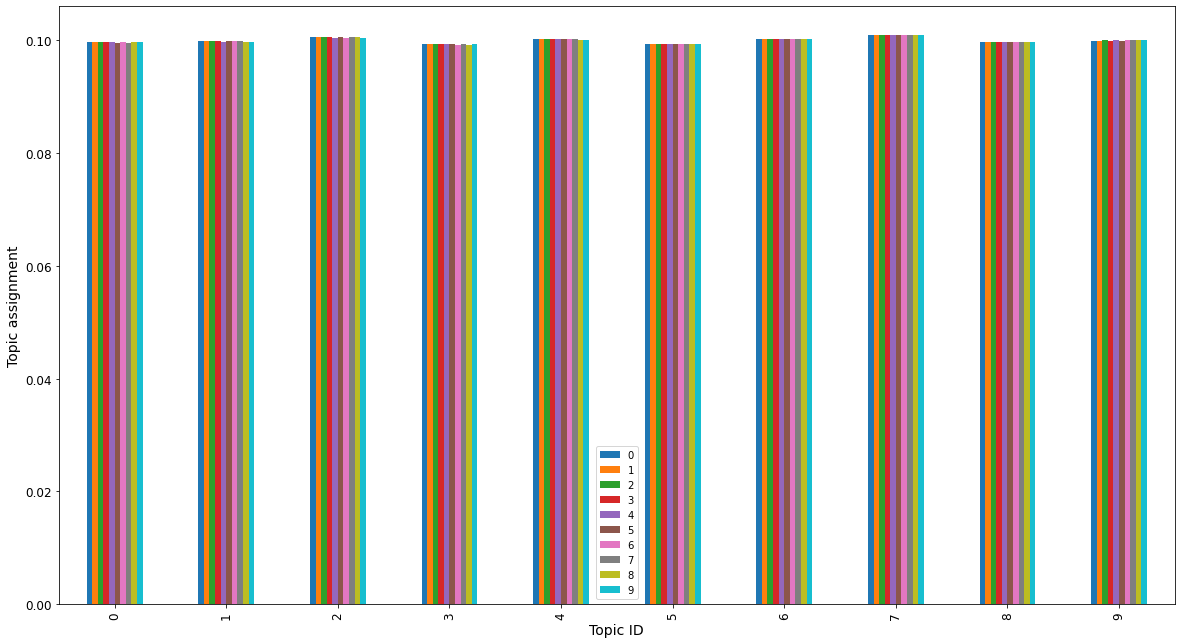

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fs = 12
df=pd.DataFrame(predictions.T)
df.plot(kind='bar', figsize=(20, 11), fontsize=fs)
plt.ylabel('Topic assignment', fontsize=fs+2)
plt.xlabel('Topic ID', fontsize=fs+2)

In [121]:
!{sys.executable} -m pip install mxnet
import mxnet as mx

## Load model artifacts stored in output directory
---

In [122]:
model_path = os.path.join(output_prefix, ntm._current_job_name, "output/model.tar.gz")
model_path

'sagemaker/regalado/output/ntm-2021-06-19-09-14-30-596/output/model.tar.gz'

In [123]:
boto3.resource("s3").Bucket(bucket).download_file(model_path, "downloaded_model.tar.gz")

In [124]:
!pwd

/home/ec2-user/SageMaker/my-experiments


In [125]:
import tarfile
tarfile.open('downloaded_model.tar.gz').extractall()

In [126]:
import zipfile
with zipfile.ZipFile('model_algo-1', 'r') as zip_ref:
    zip_ref.extractall('./')

In [127]:
model = mx.ndarray.load("params")
W = model["arg:projection_weight"]

In [128]:
!{sys.executable} -m pip install wordcloud
import wordcloud as wc

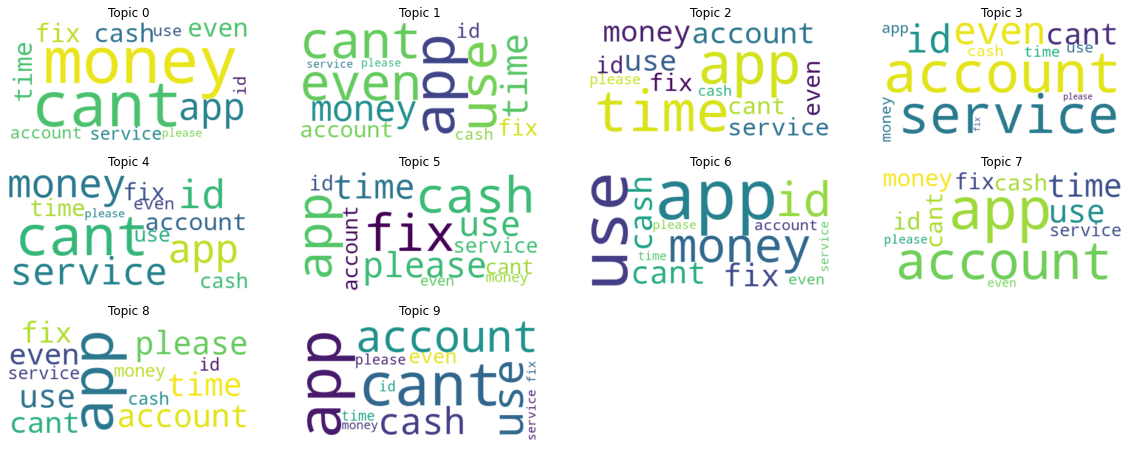

In [129]:
import matplotlib.pyplot as plt

word_to_id = dict()
for i, v in enumerate(vocab_list):
    word_to_id[v] = i

limit = 25
n_col = 4
counter = 0

plt.figure(figsize=(20, 16))
for ind in range(num_topics):

    if counter >= limit:
        break

    title_str = "Topic {}".format(ind)

    # pvals = mx.nd.softmax(W[:, ind]).asnumpy()
    pvals = mx.nd.softmax(mx.nd.array(W[:, ind])).asnumpy()

    word_freq = dict()
    for k in word_to_id.keys():
        i = word_to_id[k]
        word_freq[k] = pvals[i]

    wordcloud = wc.WordCloud(background_color="white").fit_words(word_freq)

    plt.subplot(limit // n_col, n_col, counter + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_str)
    # plt.close()

    counter += 1